# Import Libraries 

In [75]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

import nltk

# Step0. Load Datasets

In [2]:
books_data = pd.read_parquet("C:/Users/adria/Documents/Data_bases/Books/Amazon_Books_Reviews/books_data/books_data.parquet")
books_ratings = pd.read_parquet("C:/Users/adria/Documents/Data_bases/Books/Amazon_Books_Reviews/books_data/books_ratings.parquet")

In [58]:
# Rename book_ratings columns
books_ratings.rename(columns={'Id':'book_id', 'review/score': 'review_score','Title':'title', 'review/helpfulness':'review_helpfulness','review/text':'review_text'}, inplace=True)
books_ratings.columns

Index(['book_id', 'title', 'Price', 'User_id', 'profileName',
       'review_helpfulness', 'review_score', 'review/time', 'review/summary',
       'review_text'],
      dtype='object')

In [59]:
desired_columns = ['book_id', 'title', 'User_id', 'profileName',
       'review_score', 'review_text']
ratings_df = books_ratings[desired_columns].copy()

# Necessary for Sentiment analysis
ratings_df = ratings_df.dropna(subset='review_text')

In [60]:
ratings_df.columns

Index(['book_id', 'title', 'User_id', 'profileName', 'review_score',
       'review_text'],
      dtype='object')

In [61]:
ratings_df.shape

(2999992, 6)

In [106]:
x = ratings_df.groupby('User_id').count()['review_score'] > 200

considerable_users = x[x].index

considerable_users

Index(['A106016KSI0YQ', 'A10T0OW97SFBB', 'A114YQ7ZT9Y1W5', 'A11DCTGTPS7M0C',
       'A126KX6FVI4T66', 'A12A08OL0TZY0W', 'A133ZC2Z8MAIED', 'A13F2IV3ME23R',
       'A13G1TKIKHGV3F', 'A13O359A2KX7YY',
       ...
       'AU7ND6NOCX9IA', 'AUEY946M1L939', 'AUHG8KSHI529U', 'AUM3YMZ0YRJE0',
       'AUTBHG6070SL4', 'AV74NYPSKHXBU', 'AWLFVCT9128JV', 'AX54G5AL870Q8',
       'AXSH6O4OP5L4M', 'AYT4FJYVCHYLE'],
      dtype='object', name='User_id', length=334)

In [107]:
filtered_rating = ratings_df[ratings_df['User_id'].isin(considerable_users)]

In [108]:
filtered_rating

,book_id,title,User_id,profileName,review_score,review_text
1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,Kevin Killian,5.0,I don't care much for Dr. Seuss but after read...
6,0826414346,Dr. Seuss: American Icon,A14OJS0VWMOSWO,Midwest Book Review,5.0,Theodor Seuss Giesel was best known as 'Dr. Se...
59,0963923080,Rising Sons and Daughters: Life Among Japan's ...,A3NIQK6ZLYEP1L,Michael Valdivielso,4.0,Steven Wardell went to Japan without reading a...
140,0789480662,Eyewitness Travel Guide to Europe,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",5.0,"Yes, this is one heavy book. It is more than l..."
176,1884734766,Dealing With Disappointment: Helping Kids Cope...,A14OJS0VWMOSWO,Midwest Book Review,5.0,Written by Elizabeth Crary (a parent educator ...
...,...,...,...,...,...,...
2999935,0786182431,Very Bad Deaths: Library Edition,A2CR57GAJKNWVV,"booksforabuck ""BooksForABuck""",4.0,Russell Walker wants to be left alone to die--...
2999937,0786182431,Very Bad Deaths: Library Edition,A1I2O9Y3X3HXLS,Arthur W. Jordin,5.0,Very Bad Deaths (2004) is the first SF novel i...
2999949,0786182431,Very Bad Deaths: Library Edition,AFVQZQ8PW0L,Harriet Klausner,5.0,"Fiftyish Canadian Russell Walker writes ""The F..."
2999960,0679417052,My Life,A9Q28YTLYREO7,"A customer ""mistermaxxx""",5.0,Magic without a doubt is Something Special.He ...


In [109]:
y = filtered_rating.groupby('title').count()['review_score']>=60
famous_books = y[y].index
famous_books

Index(['1984', 'A Connecticut Yankee in King Arthur's Court',
       'A Farewell to Arms', 'A Journey to the Center of the Earth',
       'A Portrait of the Artist as a Young Man', 'A Princess of Mars',
       'A Tree Grows in Brooklyn',
       'ANIMAL FARM - A Fairy Story (Time Reading Program Special Edition)',
       'Adventures of Huckleberry Finn', 'Alice's Adventures in Wonderland',
       ...
       'To Kill a Mocking Bird', 'To Kill a Mockingbird',
       'To kill a mockingbird', 'Treasure Island',
       'Twenty Thousand Leagues Under the Sea', 'Ulysses', 'Ulysses,',
       'Ulysses.', 'Wuthering Heights', 'Wuthering Heights (Signet classics)'],
      dtype='object', name='title', length=115)

In [110]:
final_ratings = filtered_rating[filtered_rating['title'].isin(famous_books)]

In [111]:
# Necessary for Sentiment analysis myid
final_ratings = final_ratings.reset_index().rename(columns={'index':'Id'})
final_ratings

,Id,book_id,title,User_id,profileName,review_score,review_text
0,1747,B000N6DDJQ,The Scarlet Letter A Romance,AUM3YMZ0YRJE0,Robert J. Crawford,5.0,"WHen I finally started reading this classic, I..."
1,1807,B000N6DDJQ,The Scarlet Letter A Romance,AMKZHBOK7VMQR,R. J. Marsella,5.0,Hawthorne wrote a masterful work of historical...
2,1820,B000N6DDJQ,The Scarlet Letter A Romance,AWLFVCT9128JV,"Dave_42 ""Dave_42""",4.0,I don't suppose anything can ruin a book more ...
3,1829,B000N6DDJQ,The Scarlet Letter A Romance,ABN5K7K1TM1QA,Dennis Littrell,5.0,"""All have sinned and fall short of the glory o..."
4,1830,B000N6DDJQ,The Scarlet Letter A Romance,A3IKBHODOTYYHM,"fra7299 ""fra7299""",4.0,I think the many readers who were forced to pa...
...,...,...,...,...,...,...,...
13837,2999633,B000P91JYW,Jane Eyre,A1D2C0WDCSHUWZ,"E. A Solinas ""ea_solinas""",5.0,It's hard to imagine a better gothic romance t...
13838,2999638,B000P91JYW,Jane Eyre,AHUT55E980RDR,Neal C. Reynolds,4.0,I gather this is required reading at a lot of ...
13839,2999641,B000P91JYW,Jane Eyre,A1T17LMQABMBN5,CoffeeGurl,5.0,Charlotte Bronte created quite an admirable he...
13840,2999646,B000P91JYW,Jane Eyre,AJQ1S39GZBKUG,"A. T. A. Oliveira ""A. T. A. Oliveira""",5.0,Concerning on English classic novels `Jane Eyr...


In [144]:
final_ratings.isnull().any()

Id              False
book_id         False
title           False
User_id         False
profileName     False
review_score    False
review_text     False
dtype: bool

In [149]:
filtered_books_data = books_data[books_data['Title'].isin(famous_books)]

In [154]:
filtered_books_data.rename(columns={'review/score': 'review_score','Title':'title', 'categories':'genre'}, inplace=True)

C:\Users\adria\AppData\Local\Temp\ipykernel_29096\2553439007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_books_data.rename(columns={'review/score': 'review_score','Title':'title', 'categories':'genre'}, inplace=True)


In [155]:
filtered_books_data['authors'] = filtered_books_data['authors'].str.strip("[]").str.replace("'", "")
filtered_books_data['genre'] = filtered_books_data['genre'].str.strip("[]").str.replace("'", "")

C:\Users\adria\AppData\Local\Temp\ipykernel_29096\4140544486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_books_data['authors'] = filtered_books_data['authors'].str.strip("[]").str.replace("'", "")
C:\Users\adria\AppData\Local\Temp\ipykernel_29096\4140544486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_books_data['genre'] = filtered_books_data['genre'].str.strip("[]").str.replace("'", "")


In [158]:
filtered_books_data = filtered_books_data.drop('ratingsCount', axis=1)

In [171]:
filtered_books_data.isnull().sum()

book_id           0
title             0
description      16
authors          10
image            16
previewLink       8
publisher        24
publishedDate     9
infoLink          8
genre            26
dtype: int64

In [164]:
merged_df = pd.merge(final_ratings[['book_id', 'title']],filtered_books_data, on='title', how='inner')


In [168]:
result_df = merged_df.drop_duplicates(subset='title')
result_df

,book_id,title,description,authors,image,previewLink,publisher,publishedDate,infoLink,genre
0,B000N6DDJQ,The Scarlet Letter A Romance,None,None,None,None,None,None,None,None
237,B000PBZH5M,Foundation,Voor trainers is er gratis extra materiaal bij...,"K. Louwman, Willem Kromkamp",http://books.google.com/books/content?id=GGNeA...,http://books.google.nl/books?id=GGNeAgAAQBAJ&p...,Van Haren,2012-01-01,http://books.google.nl/books?id=GGNeAgAAQBAJ&d...,Education
360,1588550311,Romeo and Juliet,None,William Shakespeare,http://books.google.com/books/content?id=6rhaA...,http://books.google.nl/books?id=6rhaAAAAcAAJ&p...,None,1734,https://play.google.com/store/books/details?id...,None
420,158855032X,Hard Times,Considered Dickens' harshest indictment of mid...,Charles Dickens,http://books.google.com/books/content?id=_feeD...,http://books.google.nl/books?id=_feeDgAAQBAJ&p...,Lulu.com,2017-03-09,http://books.google.nl/books?id=_feeDgAAQBAJ&d...,Fiction
484,9562910334,1984,"Nieuwspraak, Big Brother, het vocabulaire uit ...",George Orwell,http://books.google.com/books/content?id=gTx1A...,http://books.google.nl/books?id=gTx1AAAAQBAJ&p...,Singel Uitgeverijen,2013-05-16,https://play.google.com/store/books/details?id...,Fiction
...,...,...,...,...,...,...,...,...,...,...
13498,B000FC2QGE,Blink: The Power of Thinking Without Thinking,From the #1 bestselling author of The Bomber M...,Malcolm Gladwell,http://books.google.com/books/content?id=VKGbb...,http://books.google.com/books?id=VKGbb1hg8JAC&...,Back Bay Books,2007-04-03,https://play.google.com/store/books/details?id...,Business & Economics
13564,B000JQXNSQ,ANIMAL FARM - A Fairy Story (Time Reading Prog...,None,Gillian Fenwick,http://books.google.com/books/content?id=3q5FA...,http://books.google.com/books?id=3q5FAQAAIAAJ&...,Oak Knoll Press,1998,http://books.google.com/books?id=3q5FAQAAIAAJ&...,Biography & Autobiography
13624,0140860428,Jane Eyre (Penguin Classics),An iconic novel dressed in a fierce design by ...,Charlotte Bronte,http://books.google.com/books/content?id=9Kc_D...,http://books.google.com/books?id=9Kc_DwAAQBAJ&...,Penguin,2010-11-30,http://books.google.com/books?id=9Kc_DwAAQBAJ&...,Fiction
13691,B000EHHOVC,Animal Farm,None,None,None,None,None,None,None,None


In [169]:
filtered_books_data = result_df

In [170]:
filtered_books_data.to_parquet('C:/Users/adria/Documents/Projects/Books/Resources/DataFrames/filtered_books_data115.parquet',index=False)

# Step1. VADER Sentiment Scoring

In [ ]:
# // TODO: Add tokenizer for nltk

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm import tqdm

sia = SentimentIntensityAnalyzer()


In [ ]:
sia.polarity_scores("I love ronaldo")

{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}

In [ ]:
# Run the polarity score on the ratings_df dataset
ratings_results_dict = {}

for i, row in tqdm(ratings_df.iterrows(), total=len(ratings_df)):
    text = row['review_text']
    myid = row['Id']
    ratings_results_dict[myid] = sia.polarity_scores(text)

100%|██████████| 2999992/2999992 [1:59:41<00:00, 417.75it/s]  


In [ ]:
ratings_results_dict

In [ ]:

vaders = pd.DataFrame(ratings_results_dict).T
vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(ratings_df, how='left')


KeyboardInterrupt



# Step2. Roberta 

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

c:\Users\adria\anaconda3\envs\python_base\lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\adria\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [ ]:
# Encoding the text
def polarity_scores_roberta(example):
    # example = 'I like it a lot, haha its a lie'

    encoded_text = tokenizer(example, return_tensors='pt', padding='max_length', truncation=True, max_length=512)
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2],
    }
    return scores_dict

In [ ]:
res = {}

for i, row in tqdm(final_ratings.iterrows(), total=len(final_ratings)):
        text = row['review_text']
        myid = row['Id']
        roberta_result = polarity_scores_roberta(text)
        res[myid] = roberta_result

In [ ]:
roberta_result

{'roberta_neg': 0.029945564,
 'roberta_neu': 0.28565803,
 'roberta_pos': 0.6843964}

In [ ]:
ratings_df.review_score.values[0]

4.0

In [ ]:
len(res)

112

# Step3. Distilbert Sentiment Analysis

In [ ]:
import torch
from transformers import DistilBertTokenizer, DistilBertModel
from torch import nn
from scipy.special import softmax

In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model_path = 'C:/Users/adria/Documents/Projects/Books/Resources/Models/Sentiment Analysis/distiloberto_512t.bin'
bert_model = DistilBertModel.from_pretrained('distilbert-base-uncased')

In [ ]:
class SentimentClassifier(nn.Module):
    def __init__(self, n_classes):
        super(SentimentClassifier, self).__init__()
        self.bert = bert_model
        self.pre_classifier = nn.Linear(self.bert.config.hidden_size, self.bert.config.hidden_size)
        self.dropout = nn.Dropout(p=0.3)
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes)

    def forward(self, input_ids, attention_mask):
        # Obtain the last hidden states from the DistilBert model
        last_hidden_state = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask
        )[0]  # Take the first element of the tuple which is the last_hidden_state

        # Apply a linear layer and dropout
        pooled_output = self.pre_classifier(last_hidden_state[:, 0])  # Use the first token's embeddings for pooling
        pooled_output = nn.ReLU()(pooled_output)  # Use a ReLU activation function
        pooled_output = self.dropout(pooled_output)
        # Pass the output of the dropout layer to the output layer
        return self.out(pooled_output)

# Assuming we have 2 classes (positive and negative)
model = SentimentClassifier(n_classes=2)
model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
model.eval()

# Function to preprocess the text
def preprocess(text):
    max_len = 512
    encoding = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=max_len,
        return_token_type_ids=False,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt',
    )
    return encoding['input_ids'], encoding['attention_mask']

# Prediction function
def predict_sentiment(text):
    input_ids, attention_mask = preprocess(text)
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        # The output is logits, we need to take softmax to get probabilities
        probs = torch.nn.functional.softmax(outputs, dim=1)
        # Taking the class with the highest probability
        prediction = torch.argmax(probs, dim=1)
        return prediction.item()




In [ ]:
res = {}
classnames = ["positive", "negative"]


for i, row in tqdm(final_ratings.iterrows(), total=len(final_ratings)):
        text = row['review_text']
        myid = row['Id']
        prediction = predict_sentiment(text)
        res[myid] = classnames[prediction]
        # print(f'Text: {text}')
        # print(f'Sentiment: {classnames[prediction]}')
        # break

  0%|          | 0/13842 [00:00<?, ?it/s]

100%|██████████| 13842/13842 [2:41:48<00:00,  1.43it/s]  


In [ ]:
results_df = pd.DataFrame.from_dict(res, orient='index', columns=['Result'])
results_df = results_df.reset_index().rename(columns={'index':'Id'})
results_df = results_df.merge(final_ratings, on='Id', how='left')
results_df

,Id,Result,book_id,title,User_id,profileName,review_score,review_text
0,1747,positive,B000N6DDJQ,The Scarlet Letter A Romance,AUM3YMZ0YRJE0,Robert J. Crawford,5.0,"WHen I finally started reading this classic, I..."
1,1807,positive,B000N6DDJQ,The Scarlet Letter A Romance,AMKZHBOK7VMQR,R. J. Marsella,5.0,Hawthorne wrote a masterful work of historical...
2,1820,positive,B000N6DDJQ,The Scarlet Letter A Romance,AWLFVCT9128JV,"Dave_42 ""Dave_42""",4.0,I don't suppose anything can ruin a book more ...
3,1829,positive,B000N6DDJQ,The Scarlet Letter A Romance,ABN5K7K1TM1QA,Dennis Littrell,5.0,"""All have sinned and fall short of the glory o..."
4,1830,positive,B000N6DDJQ,The Scarlet Letter A Romance,A3IKBHODOTYYHM,"fra7299 ""fra7299""",4.0,I think the many readers who were forced to pa...
...,...,...,...,...,...,...,...,...
13837,2999633,positive,B000P91JYW,Jane Eyre,A1D2C0WDCSHUWZ,"E. A Solinas ""ea_solinas""",5.0,It's hard to imagine a better gothic romance t...
13838,2999638,positive,B000P91JYW,Jane Eyre,AHUT55E980RDR,Neal C. Reynolds,4.0,I gather this is required reading at a lot of ...
13839,2999641,positive,B000P91JYW,Jane Eyre,A1T17LMQABMBN5,CoffeeGurl,5.0,Charlotte Bronte created quite an admirable he...
13840,2999646,positive,B000P91JYW,Jane Eyre,AJQ1S39GZBKUG,"A. T. A. Oliveira ""A. T. A. Oliveira""",5.0,Concerning on English classic novels `Jane Eyr...


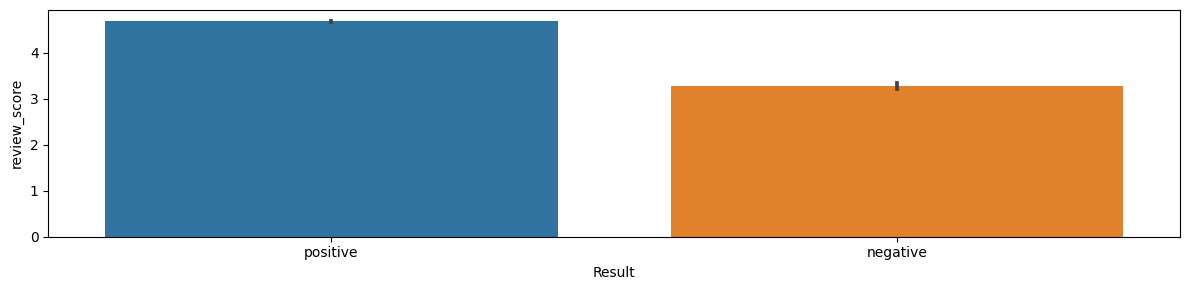

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1, figsize=(12, 3))
sns.barplot(data=results_df, x='Result', y='review_score')
# sns.barplot(data=results_df, x='review_score', y='roberta_neu', ax=axs[1])
# sns.barplot(data=results_df, x='review_score', y='roberta_neg', ax=axs[2])
# axs[0].set_title('Result')
# axs[1].set_title('Neutral')
# axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [ ]:
results_df.to_csv("C:/Users/adria/Documents/Projects/Books/Resources/DataFrames/SentimentAnalysis/200plusRatingsPerUser_60plusRatingsPerBook/results_df_distilbert.csv",index=False)
results_df.to_parquet("C:/Users/adria/Documents/Projects/Books/Resources/DataFrames/SentimentAnalysis/200plusRatingsPerUser_60plusRatingsPerBook/results_df_distilbert.parquet",index=False)

In [ ]:
def count_tokens(df):
    # Initialize a count variable
    token_count = 0

    # Iterate over the dataframe rows
    for row in df.itertuples():
        # Split the text into tokens
        tokens = row.review_text.split()

        # Update the token count
        token_count += len(tokens)

    return token_count

# Load the dataframe
tokens_df = results_df[['review_text']].copy()

# Count the tokens in the dataframe
token_count = count_tokens(tokens_df)

print("Total number of tokens 13,842 rows:", token_count)

token_count = count_tokens(ratings_df)

print("Total number of tokens 2,999,992 rows:", token_count)

Total number of tokens 13,842 rows: 4704571
Total number of tokens 2,999,992 rows: 430839022


In [ ]:
# results df with Roberta

results_df_roberta = pd.read_parquet("C:/Users/adria/Documents/Projects/Books/Resources/DataFrames/SentimentAnalysis/200plusRatingsPerUser_60plusRatingsPerBook/results_df.parquet")

In [ ]:
results_df_roberta_distilbert = pd.DataFrame.from_dict(res, orient='index', columns=['Result'])
results_df_roberta_distilbert = results_df_roberta_distilbert.reset_index().rename(columns={'index':'Id'})
results_df_roberta_distilbert = results_df_roberta_distilbert.merge(results_df_roberta, on='Id', how='left')
results_df_roberta_distilbert

,Id,Result,roberta_neg,roberta_neu,roberta_pos,book_id,title,User_id,profileName,review_score,review_text
0,1747,positive,0.004265,0.053986,0.941749,B000N6DDJQ,The Scarlet Letter A Romance,AUM3YMZ0YRJE0,Robert J. Crawford,5.0,"WHen I finally started reading this classic, I..."
1,1807,positive,0.011064,0.125440,0.863495,B000N6DDJQ,The Scarlet Letter A Romance,AMKZHBOK7VMQR,R. J. Marsella,5.0,Hawthorne wrote a masterful work of historical...
2,1820,positive,0.118758,0.562613,0.318629,B000N6DDJQ,The Scarlet Letter A Romance,AWLFVCT9128JV,"Dave_42 ""Dave_42""",4.0,I don't suppose anything can ruin a book more ...
3,1829,positive,0.542925,0.406122,0.050953,B000N6DDJQ,The Scarlet Letter A Romance,ABN5K7K1TM1QA,Dennis Littrell,5.0,"""All have sinned and fall short of the glory o..."
4,1830,positive,0.360523,0.539366,0.100111,B000N6DDJQ,The Scarlet Letter A Romance,A3IKBHODOTYYHM,"fra7299 ""fra7299""",4.0,I think the many readers who were forced to pa...
...,...,...,...,...,...,...,...,...,...,...,...
13837,2999633,positive,0.186010,0.572785,0.241205,B000P91JYW,Jane Eyre,A1D2C0WDCSHUWZ,"E. A Solinas ""ea_solinas""",5.0,It's hard to imagine a better gothic romance t...
13838,2999638,positive,0.118917,0.479040,0.402043,B000P91JYW,Jane Eyre,AHUT55E980RDR,Neal C. Reynolds,4.0,I gather this is required reading at a lot of ...
13839,2999641,positive,0.007511,0.075959,0.916531,B000P91JYW,Jane Eyre,A1T17LMQABMBN5,CoffeeGurl,5.0,Charlotte Bronte created quite an admirable he...
13840,2999646,positive,0.189373,0.449315,0.361312,B000P91JYW,Jane Eyre,AJQ1S39GZBKUG,"A. T. A. Oliveira ""A. T. A. Oliveira""",5.0,Concerning on English classic novels `Jane Eyr...


In [ ]:
results_df_roberta_distilbert.to_parquet("C:/Users/adria/Documents/Projects/Books/Resources/DataFrames/SentimentAnalysis/200plusRatingsPerUser_60plusRatingsPerBook/results_df_roberta_distilbert.parquet",index=False)

In [ ]:
results_df_roberta_distilbert.to_csv("C:/Users/adria/Documents/Projects/Books/Resources/DataFrames/SentimentAnalysis/200plusRatingsPerUser_60plusRatingsPerBook/results_df_roberta_distilbert.csv",index=False)